In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the data and analyzing it


In [2]:
train_df = pd.read_csv("../data/Train_rev1.csv")

train_df.head()
# This will help me pick the best features to use for the model and the target variable

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


In [4]:
print("\nUnique Categories:")
print(train_df['Category'].value_counts())

print("\nUnique Contract Types:")
print(train_df['ContractType'].value_counts(dropna=False))

print("\nUnique Contract Times:")
print(train_df['ContractTime'].value_counts(dropna=False))


Unique Categories:
Category
IT Jobs                             38483
Engineering Jobs                    25174
Accounting & Finance Jobs           21846
Healthcare & Nursing Jobs           21076
Sales Jobs                          17272
Other/General Jobs                  17055
Teaching Jobs                       12637
Hospitality & Catering Jobs         11351
PR, Advertising & Marketing Jobs     8854
Trade & Construction Jobs            8837
HR & Recruitment Jobs                7713
Admin Jobs                           7614
Retail Jobs                          6584
Customer Services Jobs               6063
Legal Jobs                           3939
Manufacturing Jobs                   3765
Logistics & Warehouse Jobs           3633
Social work Jobs                     3455
Consultancy Jobs                     3263
Travel Jobs                          3126
Scientific & QA Jobs                 2489
Charity & Voluntary Jobs             2332
Energy, Oil & Gas Jobs               2255
Creat

In [5]:
print("\nTop 10 Locations:")
print(train_df['LocationNormalized'].value_counts().head(10))


Top 10 Locations:
LocationNormalized
UK                   41093
London               30522
South East London    11713
The City              6678
Manchester            3516
Leeds                 3401
Birmingham            3061
Central London        2607
West Midlands         2540
Surrey                2397
Name: count, dtype: int64


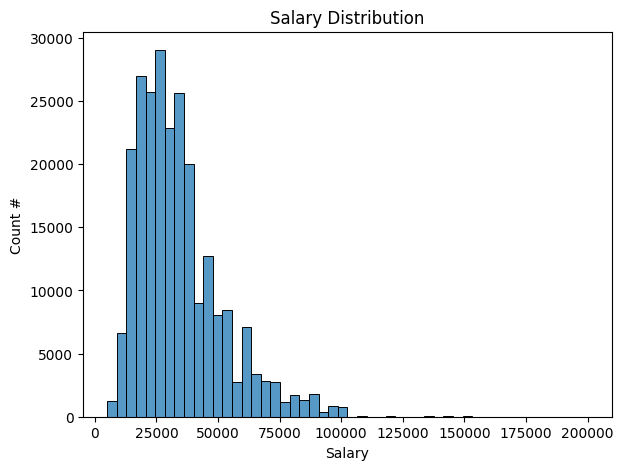

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='SalaryNormalized', bins=50)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count #')
plt.show()

# Model Building

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
feature_cols = ['Category', 'ContractType', 'ContractTime', 'LocationNormalized']
target_col = 'SalaryNormalized'

# Create a copy of the data 
X = train_df[feature_cols].copy()
y = train_df[target_col]

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:


# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error: £{rmse:.2f}")
print(f"R² Score: {r2:.3f}")


# Note: This was taking a long time to run, so I'll try to optimize it later

KeyboardInterrupt: 

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error: £{rmse:.2f}")
print(f"R² Score: {r2:.3f}")

LinAlgError: SVD did not converge in Linear Least Squares

In [11]:
# reducing dimensionality by limiting rare categories
min_samples = 100
for col in feature_cols:
    value_counts = train_df[col].value_counts()
    common_categories = value_counts[value_counts >= min_samples].index
    train_df[col] = train_df[col].apply(lambda x: x if x in common_categories else 'Other')

X = train_df[feature_cols].copy()
y = train_df[target_col]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error: £{rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Root Mean Square Error: £15254.45
R² Score: 0.252


Note: This is not a great model, I might have to try various other models and use encode job title and description as well. But I won't have time to build a web app then.

In [12]:
# Saving the model
import joblib
import os

os.makedirs('../app/models', exist_ok=True)

joblib.dump(lin_reg, '../app/models/linear_regression_model.joblib')
joblib.dump(encoder, '../app/models/encoder.joblib')

import json
with open('../app/models/feature_cols.json', 'w') as f:
    json.dump(feature_cols, f)